<h1 style="text-align:center;">Miscellaneous</h1>

In [1]:
%%HTML
<style>
    .note {
        background-color: hsl(60, 100%, 80%);
        border: 1px solid transparent;
        border-radius: 5px;
        padding: 5px;
    }
</style>

<h2>Applications and Attributes</h2>

In [2]:
attributes = {
    'reddit' : {
        'id' : 'com.reddit.frontpage',
        'color' : 'darkred',
        'linestyle' : 'solid',
        'marker': 'tri_down'
    },
    'spotify': {
        'id' : 'com.spotify.music',
        'color': 'green',
        'linestyle': 'dotted',
        'linewidth': '1',
        'marker': 'circle'
    },
    'snapchat': {
        'id' : 'com.snapchat.android',
        'color': 'yellow',
        'linestyle': 'dotted',
        'linewidth': '1',
        'marker': 'circle'
    },
    'soundcloud': {
        'id' : 'com.soundcloud.android',
        'color': 'orange',
        'linestyle': 'solid',
        'linewidth': '1',
        'marker': 'circle'
    },
    'viber': {
        'id' : 'com.viber.voip',
        'color': 'purple',
        'linestyle': 'dotted',
        'linewidth': '1',
        'marker': 'circle'
    },
    'tumblr': {
        'id' : 'com.tumblr',
        'color': 'teal',
        'linestyle': 'solid',
        'linewidth': '1',
        'marker': 'circle'
    },
    'tencent': {
        'id' : 'com.tencent.mm',
        'color': 'lime',
        'linestyle': 'dotted',
        'linewidth': '1',
        'marker': 'circle'
    },
    'whatsapp': {
        'id' : 'com.whatsapp',
        'color': 'gray',
        'linestyle': 'dotted',
        'linewidth': '1',
        'marker': 'circle'
    },
    'happn': {
        'id' : 'com.ftw_and_co.happn',
        'color': 'red',
        'linestyle': 'solid',
        'linewidth': '1',
        'marker': 'circle'
    },
    'twitter': {
        'id' : 'com.twitter.android',
        'color': 'turquoise',
        'linestyle': 'solid',
        'linewidth': '2',
        'marker': 'circle'
    },
    'tiktok': {
        'id' : 'com.zhiliaoapp.musically',
        'color': 'lightred',
        'linestyle': 'dotted',
        'linewidth': '1',
        'marker': 'circle'
    },
    'instagram': {
        'id' : 'com.instagram.android',
        'color': 'purple',
        'linestyle': 'solid',
        'linewidth': '2',
        'marker': 'circle'
    }
}

apps = list(attributes.keys())
app_ids = []
for app in apps:
    app_ids.append(attributes[app]['id'])
print(app_ids)

['com.reddit.frontpage', 'com.spotify.music', 'com.snapchat.android', 'com.soundcloud.android', 'com.viber.voip', 'com.tumblr', 'com.tencent.mm', 'com.whatsapp', 'com.ftw_and_co.happn', 'com.twitter.android', 'com.zhiliaoapp.musically', 'com.instagram.android']


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import re
import statistics as s
from calendar import monthrange

<h1 style="text-align:center;">Introduction</h1>

Our goal is to detect anomalies in timeseries data, namely user reviews.

## Anomaly Detection

<a href="https://bitbucket.org/rakibulmdalam/time-series-anomaly-detection-framework/src/master/">Timeseries Anomaly Detection Framework</a>


## Data
<h3 style="color:green;">Google Play Store</h3>

User review data comes with the following dimensions:
- Username (string)
- Timestamp (Datetime)
- Rating (integer)
- Likes (integer)
- Review (text)
- Replied to (boolean)

### Granularity

In popular apps reviews can be spaced in time by as little as a few seconds. In less popular apps they can be spaced by more.

Given that each review is timestamped, we can collect averages for any time unit:
- Hour
- Day
- Month
- Year

### Enriching the data

We append columns based on existing columns:

<ul>
    <li>Number of characters in review (integer)</li>
    <li>Number of words in review (integer)</li>
    <li>Average:</li>
    <ul>
        <li>Words</li>
        <li>Chars</li>
        <li>Rating</li>
        <li>Likes</li>
        <li>Reviews</li>
    </ul>
</ul>

Preliminary cleaning of data:
- Remove reviews with less than three words

Via a classification algorithm we give the reviews a category:
- Improvement request
- Bug report
- Other

Similarly, via a classification algorithm we deduce the review sentiment:
- Good
- Bad

Finally, we re-structure the data to fit the anomaly detection framework:

<table style="float:left;border:1px solid gray;">
    <tr>
        <th>Time</th>
        <th>ReviewCount</th>
        <th>Rating</th>
        <th>Words</th>
        <th>Chars</th>
        <th>Good</th>
        <th>Bad</th>
        <th>ImprovementRequest</th>
        <th>BugReport</th>
        <th>Other</th>
    </tr>
    <tr>
        <td>31-01-2020 16:20</td>
        <td>540</td>
        <td>2394</td>
        <td>13200</td>
        <td>32193</td>
        <td>120</td>
        <td>180</td>
        <td>19</td>
        <td>45</td>
        <td>411</td>
    </tr>
</table>

<br>
<br>
<br>
<br>
<br>
<span class="note"><strong>NB:</strong> The framework requires each entry to be equally spaced in time!</span>
<br>
<br>
<span class="note"><strong>NB:</strong> The framework requires first column to be named 'Time' and to have format <strong>%d.%m.%Y %H:%M</strong></span>

<h2 style="color:skyblue">Sources</h2>

- Amazon App Store http://jmcauley.ucsd.edu/data/amazon/
- Google Play Store https://github.com/facundoolano/google-play-scraper

<h2 style="color:purple">Apps</h2>

- Reddit
- Spotify
- Tumblr
- Tencent
- Soundcloud
- Snapchat
- Viber
- Twitter
- Instagram
- Happn
- TikTok
- WhatsApp

<h1 style="color:olive;text-align:center;">Function Definitions</h1>

In [4]:
def pie_chart(sizes, labels, title):
    fig, ax = plt.subplots()
    plt.style.use('fast')
    fig=plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='w')
    ax.pie(sizes,
          labels=labels,
          autopct='%1.1f%%',
          shadow=True,
          startangle=90)

    ax.axis('equal')
    ax.set(aspect="equal", title=title)
    plt.show()
    
def multi_lineplot2(props, df, title):
    fig = plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
    plt.style.use('fast')
    
    for key, value in props.items():
        plt.plot(df.index,
                df[key],
                label=key,
                color='%s' % props[key]['color'],
                linestyle='%s' % props[key]['linestyle'],
                linewidth=1)
    plt.title(title)
    plt.legend(loc='lower right')
    
def multi_lineplot(dictionary_appname_properties, dataframe, title):
    fig=plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
    plt.style.use('classic')
    for app, prop in dictionary_appname_properties.items():
        plt.plot(dataframe.index,
                dataframe[app],
                label=app,
                color='%s' % applications[app]['color'],
                linestyle='%s' % applications[app]['linestyle'],
                linewidth=1)
    plt.title(title)
    plt.legend(loc='lower right')
    
def lineplot(xaxis, yaxis, title):
    fig = plt.figure(figsize=(10, 5), dpi = 80, facecolor = 'w', edgecolor = 'k')
    plt.style.use('fast')
    plt.xticks(np.arange(min(yaxis), max(yaxis)+1, 1))
    plt.plot(xaxis,
            yaxis,
            linewidth=1)
    plt.title(title)

def drop_short_reviews(mode, minimum, dataframe):
    indices_to_drop = []
    for index, row in dataframe.iterrows():
        review = row['Review']
        if isinstance(review, str):
            if mode == "word":
                words = re.split(" |-", review)
                if len(words) < minimum:
                    indices_to_drop.append(index)
            else:
                if len(review) < minimum:
                    indices_to_drop.append(index)
    return indices_to_drop

<h1 style="text-align:center;">Data Pre-processing</h1>

## Structure
We want two __master__ dataframes:
1. __sum_df__: Holds all dimension sums per app (daily, hourly, ..)

2. __avg_df__: Holds all averages of dimensions per app (daily, hourly, ..)

The __key__ is the name of the app, and the __value__ is the app's dataframe.

## Timeframe
All analysis is performed on reviews found in the year __2019__.

In [5]:
dfs = {} # starting dataframes from .csv import

mdfs = {} # DICT ('app_name') > DICT (month #) > DATAFRAME ('col') > LIST (values)
          # mdfs['spotify'][6]['ReviewCount']
          # mdfs['spotify'][6].loc['2019-01-01':'2019-01-10']

In [6]:
for k, v in attributes.items():
    print(attributes[k]['id'])

com.reddit.frontpage
com.spotify.music
com.snapchat.android
com.soundcloud.android
com.viber.voip
com.tumblr
com.tencent.mm
com.whatsapp
com.ftw_and_co.happn
com.twitter.android
com.zhiliaoapp.musically
com.instagram.android


<h1 style='font-size: 5em;'>Import</h1>

In [7]:
year = '2019'

for k, v in attributes.items():
    print(f"Importing {attributes[k]['id']}, putting it in a master dataframe 'dfs' with key {k}")
    dfs[k] = pd.read_csv("data/gplay_reviews/" + attributes[k]['id'] + ".csv",
                          index_col="Timestamp",
                          parse_dates=True).loc[year]

dfs["reddit"].head(3)

Importing com.reddit.frontpage, putting it in a master dataframe 'dfs' with key reddit
Importing com.spotify.music, putting it in a master dataframe 'dfs' with key spotify
Importing com.snapchat.android, putting it in a master dataframe 'dfs' with key snapchat
Importing com.soundcloud.android, putting it in a master dataframe 'dfs' with key soundcloud


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Importing com.viber.voip, putting it in a master dataframe 'dfs' with key viber
Importing com.tumblr, putting it in a master dataframe 'dfs' with key tumblr
Importing com.tencent.mm, putting it in a master dataframe 'dfs' with key tencent
Importing com.whatsapp, putting it in a master dataframe 'dfs' with key whatsapp
Importing com.ftw_and_co.happn, putting it in a master dataframe 'dfs' with key happn
Importing com.twitter.android, putting it in a master dataframe 'dfs' with key twitter
Importing com.zhiliaoapp.musically, putting it in a master dataframe 'dfs' with key tiktok
Importing com.instagram.android, putting it in a master dataframe 'dfs' with key instagram


,Username,Rating,Review,Likes,ReplyDate
Timestamp,,,,,
2019-12-31 23:36:53.970000+00:00,Robert Bolton,5,Watch hours of your life vanish with glee,0,NaN
2019-12-31 23:31:41.285000+00:00,Sandra Thomas,5,Reddit is news and humanity! It's a conglomera...,0,NaN
2019-12-31 23:22:35.779000+00:00,Mamali Ph,5,Awesome,0,NaN


# Quick Data Overview

In [8]:
for app, df in dfs.items():
    df.head(2)

In [9]:
# average of rating in date range
s.mean(dfs['reddit'].loc['2019-01-01':'2019-12-30']['Rating'])

4.38956906161571

In [10]:
type(dfs['reddit'].index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
dfs['reddit'].head(3)

,Username,Rating,Review,Likes,ReplyDate
Timestamp,,,,,
2019-12-31 23:36:53.970000+00:00,Robert Bolton,5,Watch hours of your life vanish with glee,0,NaN
2019-12-31 23:31:41.285000+00:00,Sandra Thomas,5,Reddit is news and humanity! It's a conglomera...,0,NaN
2019-12-31 23:22:35.779000+00:00,Mamali Ph,5,Awesome,0,NaN


In [12]:
# the earliest date of a review for 'reddit' data set
min(dfs['reddit'].index)

Timestamp('2019-01-01 00:03:23.200000+0000', tz='UTC')

In [13]:
# the latest date of a review for 'reddit'
max(dfs["reddit"].index)

Timestamp('2019-12-31 23:36:53.970000+0000', tz='UTC')

In [14]:
# take 24 hours from 12am to 12am
dfs['reddit'].loc['2019-02-02 12:00:00':'2019-02-03 12:00:00']

,Username,Rating,Review,Likes,ReplyDate
Timestamp,,,,,
2019-02-03 11:54:33.539000+00:00,Kelly Spicer,5,"i love reddit!! such positive, fun pages and a...",0,NaN
2019-02-03 11:46:25.994000+00:00,R Roscoe,5,great work day break,0,NaN
2019-02-03 11:38:19.261000+00:00,A Google user,5,I love reddit 10/10 (or 5/5 in this case) that...,0,NaN
2019-02-03 11:28:53.644000+00:00,Seth Trey,5,Really the best sort-of-social network.,0,NaN
2019-02-03 11:19:23.890000+00:00,Barry Johnson,5,Works well,0,NaN
...,...,...,...,...,...
2019-02-02 12:17:48.357000+00:00,Suhaib Shah,4,"Great App, almost everything works perfectly f...",9,NaN
2019-02-02 12:09:48.817000+00:00,Monimonika18,4,So needs a Find function so we could search th...,0,NaN
2019-02-02 12:06:14.346000+00:00,Mani Deep,5,Original Content of memes,0,NaN


In [15]:
review = dfs['reddit'].loc['2019-02-03 11:19:23']['Review'][0]
review

'Works well'

In [16]:
len(review) # Characters

10

In [17]:
word_arr = re.split(" |-", review)
len(word_arr) # Words

2

In [18]:
type(word_arr[0]) == str

True

In [19]:
len(dfs['reddit'])

105105

# Removing Short Reviews

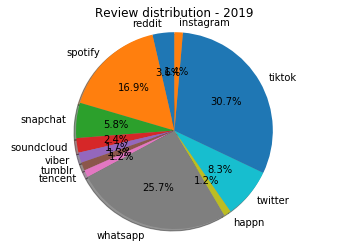

<Figure size 1120x800 with 0 Axes>

2932280

In [20]:
sizes = []
for app, dataframe in dfs.items():
    sizes.append(len(dfs[app]))
    
pie_chart(sizes, apps, "Review distribution - 2019")
sum(sizes)

In [21]:
# original length
print(len(dfs["reddit"]))

105105


In [22]:
# slow
# for app, dataframe in dfs.items():
#     indices_to_remove = drop_short_reviews("word", 3, dataframe)
#     dfs[app] = dfs[app].drop(indices_to_remove) 

In [23]:
# length after clean
print(len(dfs["reddit"]))

105105


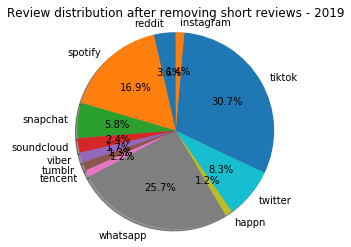

<Figure size 1120x800 with 0 Axes>

2932280

In [24]:
sizes = []
for app in apps:
    sizes.append(len(dfs[app]))
    
pie_chart(sizes, apps, "Review distribution after removing short reviews - 2019")
sum(sizes)

In [25]:
dfs["reddit"].head(1)

,Username,Rating,Review,Likes,ReplyDate
Timestamp,,,,,
2019-12-31 23:36:53.970000+00:00,Robert Bolton,5,Watch hours of your life vanish with glee,0,NaN


# Adding time related columns

In [26]:
for app, df in dfs.items():
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Weekday Name'] = df.index.weekday_name
    
dfs['reddit'].head(1)

,Username,Rating,Review,Likes,ReplyDate,Year,Month,Weekday Name
Timestamp,,,,,,,,
2019-12-31 23:36:53.970000+00:00,Robert Bolton,5,Watch hours of your life vanish with glee,0,NaN,2019,12,Tuesday


# Adding columns for review length

In [27]:
for app, dataframe in dfs.items():
    review_wordcount = []
    review_charcount = []
    for review in dataframe['Review'].astype('str'):
        review_wordcount.append(len(re.split(" |-", review)))
        review_charcount.append(len(review))
    dfs[app].insert(3, 'Words', review_wordcount)
    dfs[app].insert(4, 'Chars', review_charcount)

In [28]:
dfs["reddit"].head(10)

,Username,Rating,Review,Words,Chars,Likes,ReplyDate,Year,Month,Weekday Name
Timestamp,,,,,,,,,,
2019-12-31 23:36:53.970000+00:00,Robert Bolton,5,Watch hours of your life vanish with glee,8,41,0,NaN,2019,12,Tuesday
2019-12-31 23:31:41.285000+00:00,Sandra Thomas,5,Reddit is news and humanity! It's a conglomera...,12,79,0,NaN,2019,12,Tuesday
2019-12-31 23:22:35.779000+00:00,Mamali Ph,5,Awesome,1,7,0,NaN,2019,12,Tuesday
2019-12-31 23:13:55.547000+00:00,Garry Wells,5,My daily go to for news the concerns me.,9,40,0,NaN,2019,12,Tuesday
2019-12-31 23:12:55.560000+00:00,Susan Pierce,5,Love it,2,7,0,NaN,2019,12,Tuesday
2019-12-31 23:05:32.200000+00:00,Andre Botha,4,Love the diversity of topics. Redditors have a...,12,70,0,NaN,2019,12,Tuesday
2019-12-31 22:36:29.991000+00:00,Enzo T. F.,5,Gooooood meeeemz,2,16,0,NaN,2019,12,Tuesday
2019-12-31 22:16:40.141000+00:00,KWACKING DUCK,5,The best memeS EVERRRRRRR. I FREAKINGG LOOOVVV...,8,53,0,NaN,2019,12,Tuesday
2019-12-31 22:15:54.187000+00:00,B. Ol,5,"Good app, but the discussion and the people be...",14,73,1,NaN,2019,12,Tuesday


In [29]:
min(dfs['reddit'].index)

Timestamp('2019-01-01 00:03:23.200000+0000', tz='UTC')

In [30]:
max(dfs['reddit'].index)

Timestamp('2019-12-31 23:36:53.970000+0000', tz='UTC')

# Make monthly dictionary for each app (appname_monthly)
- Key: Month number (1, 12)
- Value: Dictionary with daily totals

In [31]:
# Returns the daily totals of all dimensions (words, chars, likes, ..) for one month as
# a dictionary with key = name_of_column, and value = list_of_daily_values_that_month
#
# Use:     get_monthly(year, month, "app_name")
# Example: get_monthly(2019, 1, "reddit")
# Return:  dictionary (key/value column_name/list_of_values)
#
def get_monthly(year, month, app):
    mrange = range(monthrange(year, month)[1])
    year_month = str(year) + "-" + str(month)
    mdf = dfs[app].loc[year_month]

    print(f"{app} -\t {year} -\t {month} -\t {mrange}")
    
    data = {
        "Day": [],
        "ReviewCount": [],
        "Words": [],
        "Chars": [],
        "Likes": [],
        "Rating": [],
        "Avg_Words": [],
        "Avg_Chars" : [],
        "Avg_Likes": [],
        "Avg_Rating": []
    }
    
    for n in mrange:
        day = n + 1
        date = year_month + "-" + str(day)
        data["Day"].append(date);
        data["ReviewCount"].append(len(dfs[app].loc[date]))
        data["Words"].append(sum(dfs[app].loc[date]["Words"]))
        data["Chars"].append(sum(dfs[app].loc[date]["Chars"]))
        data["Likes"].append(sum(dfs[app].loc[date]["Likes"]))
        data["Rating"].append(sum(dfs[app].loc[date]["Rating"]))
        
        if (len(dfs[app].loc[date]["Words"]) > 0):
            data["Avg_Words"].append(round(s.mean(dfs[app].loc[date]["Words"])))
        else:
            data["Avg_Words"].append(0)
            
        if (len(dfs[app].loc[date]["Chars"]) > 0):
            data["Avg_Chars"].append(round(s.mean(dfs[app].loc[date]["Chars"])))
        else:
            data["Avg_Chars"].append(0)
            
        if (len(dfs[app].loc[date]["Likes"]) > 0):
            data["Avg_Likes"].append(round(s.mean(dfs[app].loc[date]["Likes"])))
        else:
            data["Avg_Likes"].append(0)
            
        if (len(dfs[app].loc[date]["Rating"]) > 0):
            data["Avg_Rating"].append(round(s.mean(dfs[app].loc[date]["Rating"])))
        else:
            data["Avg_Rating"].append(0)
    return data

In [32]:
for app, dataframe in dfs.items():
    print(app)
    print(len(dfs[app].loc['2019-10-10']['Words']))
    print(len(dfs[app].loc['2019-10-10']['Chars']))
    print(len(dfs[app].loc['2019-10-10']['Likes']))
    print(len(dfs[app].loc['2019-10-10']['Rating']))

reddit
450
450
450
450
spotify
1155
1155
1155
1155
snapchat
887
887
887
887
soundcloud
177
177
177
177
viber
128
128
128
128
tumblr
73
73
73
73
tencent
101
101
101
101
whatsapp
0
0
0
0
happn
75
75
75
75
twitter
517
517
517
517
tiktok
3732
3732
3732
3732
instagram
0
0
0
0


In [33]:
for app, dataframe in dfs.items():
    appname = str(app)
    exec(appname + "_monthly = {}")
    for i in range(1,13):
        exec(appname + "_monthly[i] = get_monthly(2019, i, appname)")

reddit -	 2019 -	 1 -	 range(0, 31)
reddit -	 2019 -	 2 -	 range(0, 28)
reddit -	 2019 -	 3 -	 range(0, 31)
reddit -	 2019 -	 4 -	 range(0, 30)
reddit -	 2019 -	 5 -	 range(0, 31)
reddit -	 2019 -	 6 -	 range(0, 30)
reddit -	 2019 -	 7 -	 range(0, 31)
reddit -	 2019 -	 8 -	 range(0, 31)
reddit -	 2019 -	 9 -	 range(0, 30)
reddit -	 2019 -	 10 -	 range(0, 31)
reddit -	 2019 -	 11 -	 range(0, 30)
reddit -	 2019 -	 12 -	 range(0, 31)
spotify -	 2019 -	 1 -	 range(0, 31)
spotify -	 2019 -	 2 -	 range(0, 28)
spotify -	 2019 -	 3 -	 range(0, 31)
spotify -	 2019 -	 4 -	 range(0, 30)
spotify -	 2019 -	 5 -	 range(0, 31)
spotify -	 2019 -	 6 -	 range(0, 30)
spotify -	 2019 -	 7 -	 range(0, 31)
spotify -	 2019 -	 8 -	 range(0, 31)
spotify -	 2019 -	 9 -	 range(0, 30)
spotify -	 2019 -	 10 -	 range(0, 31)
spotify -	 2019 -	 11 -	 range(0, 30)
spotify -	 2019 -	 12 -	 range(0, 31)
snapchat -	 2019 -	 1 -	 range(0, 31)
snapchat -	 2019 -	 2 -	 range(0, 28)
snapchat -	 2019 -	 3 -	 range(0, 31)
snap

In [34]:
for app in apps:
    print(app.lower())

reddit
spotify
snapchat
soundcloud
viber
tumblr
tencent
whatsapp
happn
twitter
tiktok
instagram


In [35]:
for app in apps:
    appname = app.lower()
    exec(appname + "_m = {}")
    
    for i in range(1,13):
        exec("dict_m = " + appname + "_monthly[" + str(i) + "]")
        df = pd.DataFrame.from_dict(dict_m)
        df.index = pd.to_datetime(df['Day'])
        df = df.drop('Day', axis=1)
        exec(appname + "_m[i] = df")

# Add new monthly dataframes to master dataframe (mdfs)

Conveniently retrieve the daily totals per dimension, per app, with:
- mdfs['app_name'][month_no]

Use .loc to get a range of days of the month:
- mdfs['app_name'][month_no].loc['2019-01-01':'2019-01-05']

Example below

In [36]:
# replace dfs with the new _m dfs
for app, dataframe in dfs.items():
    exec("mdfs[app] = " + app + "_m")

In [37]:
type(mdfs['reddit'][1].index)
mdfs['reddit'][1].loc['2019-01-03':'2019-01-12']

,ReviewCount,Words,Chars,Likes,Rating,Avg_Words,Avg_Chars,Avg_Likes,Avg_Rating
Day,,,,,,,,,
2019-01-03,91,765,3856,2,375,8,42,0,4
2019-01-04,88,1070,5712,27,340,12,65,0,4
2019-01-05,112,1212,6634,53,483,11,59,0,4
2019-01-06,99,866,4659,6,430,9,47,0,4
2019-01-07,97,941,5103,6,413,10,53,0,4
2019-01-08,115,1328,7196,20,488,12,63,0,4
2019-01-09,115,1279,6706,173,488,11,58,2,4
2019-01-10,101,1020,5515,14,412,10,55,0,4
2019-01-11,83,925,4887,1,355,11,59,0,4


In [38]:
# how many days were there more than 700 reviews?
res = {count for count in mdfs['reddit'][1]['ReviewCount'].tolist() if count > 700}
len(res)

0

In [39]:
mdfs['reddit'][1].head(5)

,ReviewCount,Words,Chars,Likes,Rating,Avg_Words,Avg_Chars,Avg_Likes,Avg_Rating
Day,,,,,,,,,
2019-01-01,87,974,5165,190,364,11,59,2,4
2019-01-02,114,1115,5854,16,483,10,51,0,4
2019-01-03,91,765,3856,2,375,8,42,0,4
2019-01-04,88,1070,5712,27,340,12,65,0,4
2019-01-05,112,1212,6634,53,483,11,59,0,4


<h1 style="font-size:4em;text-align: center;color:teal;padding-top:50px;padding-bottom:50px;">Plotting Totals</h1>

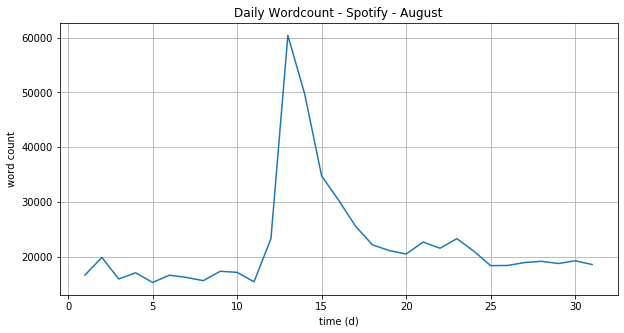

In [40]:
x = np.arange(1, monthrange(2019, 8)[1]+1)
y = spotify_m[8]['Words']

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y)
ax.set(xlabel='time (d)',
       ylabel='word count',
       title='Daily Wordcount - Spotify - August')
ax.grid()

plt.show()

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


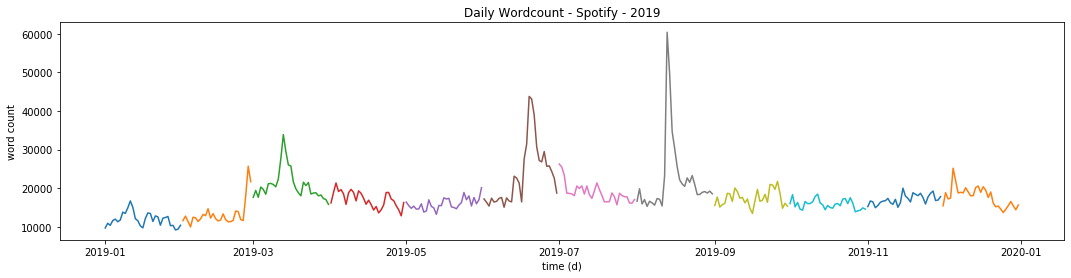

In [41]:
fig, ax = plt.subplots(figsize=(18,4))
for i in range(1,13):
    ax.plot(mdfs['spotify'][i]["Words"])
ax.set(xlabel='time (d)', ylabel='word count', title='Daily Wordcount - Spotify - 2019')

plt.show()

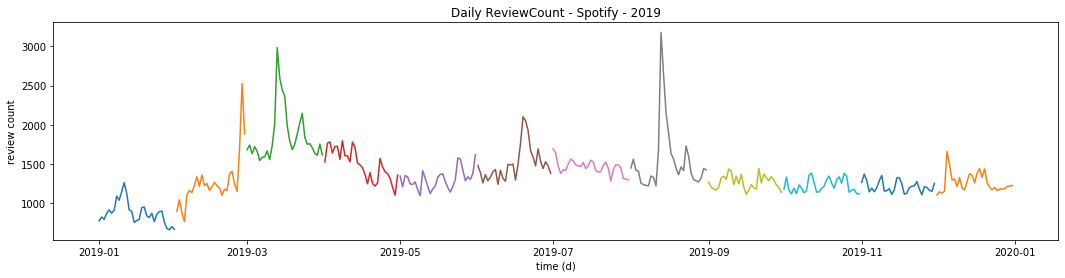

In [42]:
fig, ax = plt.subplots(figsize=(18,4))
for i in range(1,13):
    ax.plot(spotify_m[i]["ReviewCount"])
ax.set(xlabel='time (d)', ylabel='review count', title='Daily ReviewCount - Spotify - 2019')
plt.show()

In [43]:
def grid_5_plot(app, year, month, ylist, color):
    if type(month) == int:
        month_dict = {
            1: "January",
            2: "February",
            3: "March",
            4: "April",
            5: "May",
            6: "June",
            7: "July",
            8: "August",
            9: "September",
            10: "October",
            11: "November",
            12: "December"
        }
    if color == None:
        color = "blue"
        
    x = np.arange(1, monthrange(2019, month)[1]+1)
    mpl.style.use("default")
    fig = plt.figure(figsize=(12,6), constrained_layout=True)
    fig.suptitle(app.title() + " - " + month_dict[month] + " " + str(year),
                 fontsize=18,
                position=(0.5,1.1))
    gs = fig.add_gridspec(3, 2)
    
    y = ylist['ReviewCount']
    ax22 = fig.add_subplot(gs[0, :])
    ax22.plot(x, y, 'o', ls='-', ms=4, markevery=None, color=color)
    ylabel=('Review count')
    
    y = ylist['Words']
    ax00 = fig.add_subplot(gs[2, 0])
    ax00.plot(x, y, color=color)
    ax00.set(title='Wordcount')

    y = ylist['Chars']
    ax10 = fig.add_subplot(gs[2, 1])
    ax10.plot(x, y, color=color)
    ax10.set(title='Character Count')

    y = ylist['Rating']
    ax01 = fig.add_subplot(gs[1,0])
    ax01.plot(x, y, color=color)
    ax01.set_xticks([])
    ax01.set(title='Rating')

    y = ylist['Likes']
    ax11 = fig.add_subplot(gs[1,1])
    ax11.plot(x, y, color=color)
    ax11.scatter(x, y, color=color)
    ax11.set_xticks([])
    ax11.set(title='Likes')
    
def get_year_reviewcount(app):
    fig, ax = plt.subplots(figsize=(18,4))
    for i in range(1,13):
        ax.plot(mdfs[app][i]["ReviewCount"])
    ax.set(xlabel='time (d)',
           ylabel='review count',
           title='Daily ReviewCount - ' + app.title() + ' - 2019')
    plt.show()

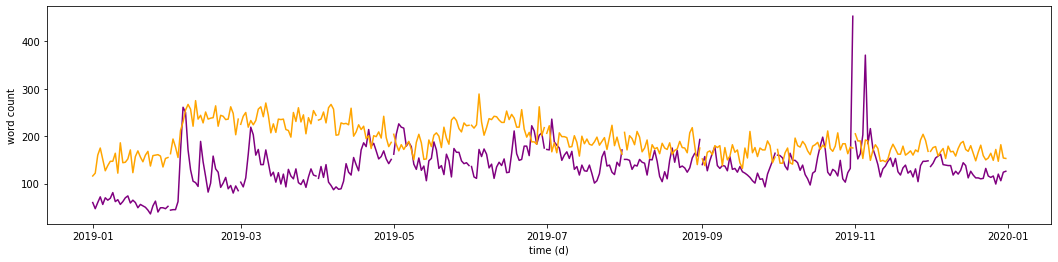

In [44]:
fig, ax = plt.subplots(figsize=(18,4))
for i in range(1,13):
    ax.plot(mdfs['viber'][i]["ReviewCount"], color="purple")
    ax.plot(mdfs['soundcloud'][i]["ReviewCount"], color="orange")
ax.set(xlabel='time (d)', ylabel='word count')

plt.show()

In [45]:
# PLOTS A LOT, SLOW, NB
# for app, df in mdfs.items():
#     get_year_reviewcount(app)
#     for i in range(1,13):
#         grid_5_plot(app, 2019, i, mdfs[app][i], color=attributes[app.title()]['color'])

<h1 style="text-align:center;font-size:4em;">Prepare Data for TSADF</h1>

<h2>Make all rows equally spaced in time</h2>

In [46]:
mdfs['viber'][3].head(10)

,ReviewCount,Words,Chars,Likes,Rating,Avg_Words,Avg_Chars,Avg_Likes,Avg_Rating
Day,,,,,,,,,
2019-03-01,103,629,3251,171,419,6,32,2,4
2019-03-02,93,530,2706,10,402,6,29,0,4
2019-03-03,112,675,3606,125,471,6,32,1,4
2019-03-04,162,1253,6683,783,698,8,41,5,4
2019-03-05,219,1980,10801,1347,941,9,49,6,4
2019-03-06,203,1881,10102,592,884,9,50,3,4
2019-03-07,160,1429,7708,385,636,9,48,2,4
2019-03-08,172,1136,6010,827,749,7,35,5,4
2019-03-09,140,991,5236,754,592,7,37,5,4


# Or just set time to 00:00

<h2>Change DatetimeIndex to the correct format</h2>

- %d.%m.%Y %H:%M

In [47]:
list(mdfs['tencent'][1]['ReviewCount'].head(3))

[65, 85, 94]

In [48]:
mdfs['tencent'][1].head(3)

,ReviewCount,Words,Chars,Likes,Rating,Avg_Words,Avg_Chars,Avg_Likes,Avg_Rating
Day,,,,,,,,,
2019-01-01,65,552,3026,7,217,8,47,0,3
2019-01-02,85,1279,6744,30,244,15,79,0,3
2019-01-03,94,992,5297,22,291,11,56,0,3


In [49]:
mdfs['tencent'][1].index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', name='Day', freq=None)

In [50]:
# takes a list of 'Timestamp' indices
# returns a list of 'String' datetime with 00:00 hrs:mins
def appendZeroTime(indices):
    new_index = [];
    for index in indices:
        index = str(index)
        date = index.split(" ")[0]
        hours = index.split(" ")[1].split(":")[0]
        minutes = index.split(" ")[1].split(":")[1]
        index = date + " 00:00"
        new_index.append(index)
    return new_index
    
print(type(mdfs['tencent']),
        type(mdfs['tencent'][1]),
        type(mdfs['tencent'][1].ReviewCount))

<class 'dict'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [51]:
from datetime import datetime, timedelta

def lp(df, col, title):
    df.index = pd.to_datetime(df.index)
    x = np.arange(df.index[0], df.index[-1], timedelta(days=1)).astype(datetime)
    y = df[col].loc[df.index[0]:df.index[-2]]
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y)
    ax.set(xlabel='date',
          ylabel=col.lower(),
          title=title)
    ax.grid()
    plt.show()
    
def lp2(df, col, title, vlines):
    df.index = pd.to_datetime(df.index)
    x = np.arange(df.index[0], df.index[-1], timedelta(days=1)).astype(datetime)
    y = df[col].loc[df.index[0]:df.index[-2]]
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y)
    ax.set(xlabel='date',
          ylabel=col.lower(),
          title=title)
    ax.grid()
    
    for vline in vlines:
        ax.axvline(vline, linewidth=2, color='r')
    
    plt.show()

In [52]:
# combine the 12 monthly dataframes for each app
# collapse into 1 dataframe with 365 daily totals
def getExportableDf(app):
    c = {
        'index' : [],
        'ReviewCount': [],
        'Words': [],
        'Chars': [],
        'Likes': [],
        'Rating': [],
        'Avg_Words': [],
        'Avg_Chars': [],
        'Avg_Likes': [],
        'Avg_Rating': []
    }
    for i in range(1,13):
        new_index = appendZeroTime(mdfs[app][i].index)
        c['index'] += new_index
        
        for col in mdfs[app][i].columns:
            c[col] += list(mdfs[app][i][col])
            
    exportable = pd.DataFrame.from_dict(c)
    exportable = exportable.set_index('index')
    exportable.index = pd.to_datetime(exportable.index,
                                     format="%Y-%m-%d %H:%S")
    exportable.index = exportable.index.strftime('%d.%m.%Y %H:%S')
    exportable.index.name = 'Time'
    
    return exportable
    
e = getExportableDf('tencent')
e.head(3)



,ReviewCount,Words,Chars,Likes,Rating,Avg_Words,Avg_Chars,Avg_Likes,Avg_Rating
Time,,,,,,,,,
01.01.2019 00:00,65,552,3026,7,217,8,47,0,3
02.01.2019 00:00,85,1279,6744,30,244,15,79,0,3
03.01.2019 00:00,94,992,5297,22,291,11,56,0,3


In [53]:
len(getExportableDf('spotify'))

365

In [54]:
e = getExportableDf('spotify')
type(e.index)

pandas.core.indexes.base.Index

# Export

In [55]:
e.to_csv('spotify_2019.csv', columns = e.columns)

In [56]:
def printMinAndMax(df):
    print(f"REVIEW \t Ma: {max(df['ReviewCount'])}\t Mi: {min(df['ReviewCount'])}")
    print(f"WORDS \t Ma: {max(df['Words'])}\t Mi: {min(df['Words'])}")
    print(f"CHARS \t Ma: {max(df['Chars'])}\t Mi: {min(df['Chars'])}")
    print(f"LIKES \t Ma: {max(df['Likes'])}\t Mi: {min(df['Likes'])}")
    print(f"RATING \t Ma: {max(df['Rating'])}\t Mi: {min(df['Rating'])}")

In [57]:
def printHighsLows(app_name):
    df = mdfs[app_name]
    print("\nHighest and lowest daily review count per month for " + app_name + "\n")
    print("MONTH\t\t\t", "HIGH\t\t\t\t\t", "LOW")
    for i in range(1,13):
        vmax = max(df[i].ReviewCount)
        vmin = min(df[i].ReviewCount)
        date_max = df[i].index[df[i]['ReviewCount'] == vmax]
        date_min = df[i].index[df[i]['ReviewCount'] == vmin]
        date_max_d = date_max.strftime("%d")[0]
        date_min_d = date_min.strftime("%d")[0]
        day_name_max = dfs[app_name].loc[date_max[0].strftime("%Y-%m-%d")]['Weekday Name'].values[0]
        day_name_min = dfs[app_name].loc[date_min[0].strftime("%Y-%m-%d")]['Weekday Name'].values[0]
        print(str(i) + "\t\t\t",
              day_name_max + ", " + str(date_max_d), "\t" + str(vmax), "\t\t\t",
              day_name_min + ", " + str(date_min_d), "\t" + str(vmin))

# Crosscheck Anomalies Detected with TSADF

Below, we look into anomalies detected with the framework.

1. Analyze dataset with framework (365 rows, daily totals)
2. Make note of what dates the framework finds anomalies
3. Retrieve the same dates from the dataframe
4. Check max() and min(); see that the framework identifies EV's

The following experiment is done using user reviews for Spotify from the Google Play Store, for the year 2019.

# Nutshell

Below is a linechart of the review count measured throughout 2019 for Spotify.

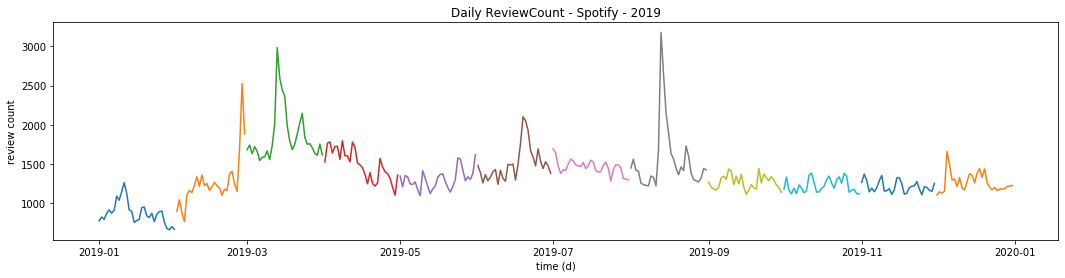

In [58]:
get_year_reviewcount('spotify')

Each month has its own color, and we can see some distinct highs and lows in the above linechart.

## What is an anomaly
Even though some of the measured values are _clearly_ higher than other measurements - they're not necessarily anomalies. It could be that these values are part of a natural (__seasonal__) pattern.

Likely, many software development companies have regular __version release cycles__ of e.g., 2 weeks. So the peaks and valleys seen in the chart are natural.

## What is seasonality
To find out, we have to crosscheck our findings -- both through visualization and use of the time series anomaly detection framework -- with _events_ occurring with the company developing the software whose data we are analyzing.

Below, we make note of the extreme values (EVs) recorded each month, pertaining to the spotify user review data. We then look into spotify logs to see if something happened prior to those dates (e.g., new version release).

### Max and min values for review count per month

In [59]:
printHighsLows('spotify')


Highest and lowest daily review count per month for spotify

MONTH			 HIGH					 LOW
1			 Friday, 11 	1261 			 Tuesday, 29 	658
2			 Wednesday, 27 	2524 			 Monday, 04 	764
3			 Wednesday, 13 	2983 			 Wednesday, 06 	1543
4			 Monday, 08 	1795 			 Monday, 29 	1101
5			 Friday, 31 	1618 			 Thursday, 09 	1094
6			 Wednesday, 19 	2102 			 Sunday, 09 	1239
7			 Monday, 01 	1692 			 Wednesday, 24 	1281
8			 Tuesday, 13 	3180 			 Thursday, 08 	1219
9			 Saturday, 21 	1444 			 Monday, 16 	1113
10			 Saturday, 12 	1383 			 Thursday, 31 	1118
11			 Saturday, 02 	1371 			 Monday, 25 	1107
12			 Thursday, 05 	1658 			 Sunday, 01 	1103


## Changelog

Below is a list of dates where a new version was released, taken from __apk4fun.com__

* SoundCloud: https://www.apk4fun.com/history/1563/2/
* Snapchat: https://www.apk4fun.com/history/1299/2/
* Spotify: https://www.apk4fun.com/history/9887/2/

<h1 style='font-size:5em;color:#333;'>APK Release History per App </h1>

In this section we consider data collected from a source of APK version history logs. We want to see if software releases can be directly correlated to peaks in user review counts.

Further, we collect the change list for some of the releases to see if we can deduce whether it's a new feature or bug/hot fixes.

<h2>Sources</h2>

* apk4fun.com

<h2>Plot Legend</h2>

<ul>
    <li style='color: blue;'>Blue line => Reviews posted</li>
    <li style='color: red;'>Red line => APK version release</li>
</ul>

<h2>Limitations</h2>

- Not all apps present a changelog with information.
- Below we consider only those who do.

In [160]:
def print_changes(app, loc, split_symbol):
    changes_string = str(apk_dfs[app].loc[loc].Changes)
    changes_list = changes_string.split(split_symbol)[1:-1]
    for change in changes_list:
        print(change + "\n")

In [83]:
apk_dfs = {}
apps = ['reddit',
       'soundcloud',
       'spotify',
       'tumblr',
       'viber',
       'snapchat']

for app in apps:
    apk_dfs[app] = pd.read_csv("data/apk4fun_history/" + app + "-apk.csv",
                          index_col="Date",
                          parse_dates=True)

apk_dfs['reddit'].loc['2020-03']

,Version,Changes
Date,,
2020-03-17,2020.9.1,"• Minor fixes and improvements,_______________..."
2020-03-11,2020.8.2,"• Bug Fix: Resolved a networking issue,• New: ..."
2020-03-03,2020.7.0,• New Notification Settings! Now you can contr...


In [84]:
apk_dfs['snapchat'].loc['2019-05']

,Version,Changes
Date,,
2019-05-29,10.58.0.0,Tap the arrow on the Camera screen to try Time...
2019-05-17,10.57.0.0,"Introducing Snap Games!,Snap Games are mobile ..."
2019-05-13,10.56.7.0,Bug fixes and improvements! 👻


# Reddit

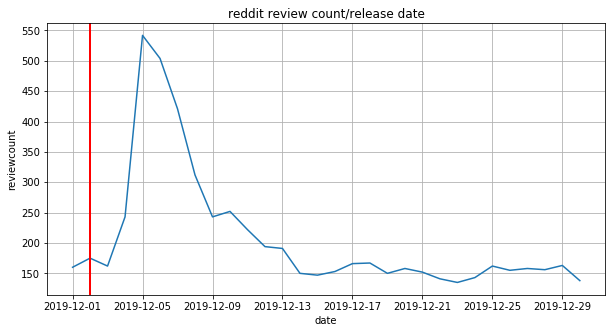

In [85]:
app = 'reddit'
i = 12
lp2(mdfs[app][i],
   'ReviewCount',
   app + ' review count/release date',
   apk_dfs[app].loc['2019-' + str(i)].index)

In [86]:
apk_dfs['reddit'].loc['2019-12']

,Version,Changes
Date,,
2019-12-02,3.41.0,• Spoiler and NSFW tags can now be set when cr...


In [87]:
pd.set_option('display.max_colwidth', -1)

In [140]:
apk_dfs['reddit'].loc['2019-12']

,Version,Changes
Date,,
2019-12-02,3.41.0,"• Spoiler and NSFW tags can now be set when creating or editing a post. This is available under the ‘More’ button, just above the keyboard,• Added support for email and password updating on a new ‘Account settings’ page under ‘Settings’,• Saved images are now tagged with the community they originated from,• Fixed a bug that caused the ‘Join’ button to show ‘Join’ even if you had already joined a community,• Fixed a bug that caused the onboarding flow to be shown despite tapping ‘Skip’"


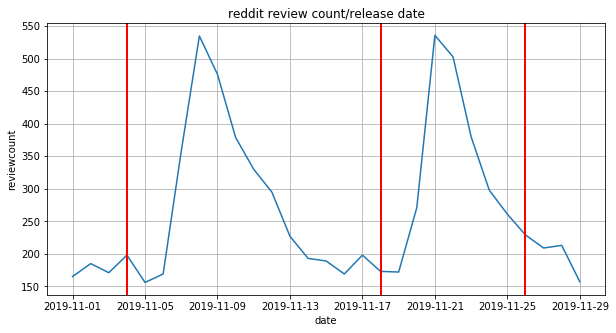

In [134]:
app = 'reddit'
i = 11
lp2(mdfs[app][i],
   'ReviewCount',
   app + ' review count/release date',
   apk_dfs[app].loc['2019-' + str(i)].index)

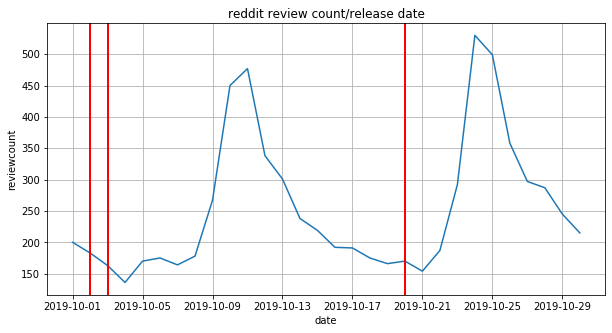

In [135]:
app = 'reddit'
i = 10
lp2(mdfs[app][i],
   'ReviewCount',
   app + ' review count/release date',
   apk_dfs[app].loc['2019-' + str(i)].index)

In [139]:
apk_dfs['reddit'].loc['2019-10']

,Version,Changes
Date,,
2019-10-20,3.38.0,"• Logged out users can now subscribe to up to 20 communities and have them transferred to their account when they sign up,• Added GIFs in comments support for r/FortNiteBR,• Fixed a bug that caused the view (Card/Classic) control not to work on search results,• Fixed an issue that stopped RPAN from loading for some users,• Fixed a crash that could occur on Popular tab,• Fixed a bug that caused the app to freeze when opening Live threads,• Fixed a crash that could occur when starting the app"
2019-10-03,3.37.0,"• Fixed a problem when replying to an inbox message displays an infinite loading state,• Fixed an issue where broadcaster on RPAN would sometimes stop receiving chat messages,• Minor bug fixes and performance improvements"
2019-10-02,3.36.1,• Fixed an issue that caused video ad screens to not load properly


<h3>User Reviews with Likes > 90</h3>

In [145]:
daf = dfs['reddit'].loc['2019-10']
daf[daf.Likes > 200]

,Username,Rating,Review,Words,Chars,Likes,ReplyDate,Year,Month,Weekday Name
Timestamp,,,,,,,,,,
2019-10-29 17:38:33.253000+00:00,Nick Enchev,2,"90% of the time when I tap a notification to open. A trending story or notification, the app does not go to the requested content. The deep linking is completely broken, if I want to find the story I have to go and look through the content list, which is a waste of time. I end up not getting back to any of the content and simply just seeing notifications without any use. Please fix, it's not hard, I've worked on proper deep linking a few times.",87,448,366,NaN,2019,10,Tuesday
2019-10-28 17:15:09.619000+00:00,inconspicuous tree,4,"It's amazing! I was suggested Reddit by a friend and it has so many features! You can see memes or funny videos, gifs, and pictures. You can ask for help on any matter, including gaming, relationships, emotional, and life in general! There is a subreddit for anyone and everything, and I mean EVERYTHING! There are subreddits for nsfw, cute, funny, cool, interesting etc. My only complaint is that there is a lot of people who hate on everything you do and post. Also the karma system is broken.",88,495,653,NaN,2019,10,Monday
2019-10-28 14:07:01.926000+00:00,Dan Charles,5,"I started using Reddit about 6 months ago and have been really enjoying it. There are loads of great subs and people to follow and talk with. I enjoy helping others and chatting about like-minded things. This app has always worked flawlessly for me. It's smooth, fast, easy to navigate and dark mode is easy on the eyes too. Such a simple and easy to use platform. Doesn't try to be everything (unlike Facebook) and just does what it's meant to really well.",84,457,239,NaN,2019,10,Monday
2019-10-16 23:47:55.880000+00:00,Carl Thomas,1,"almost constantly tells me ""had trouble getting to reddit"" recently. on top of other bugs, like threads with media breaking navigation, this app is useless. Feels like modding was thrown in as an afterthought: modqueue doesn't work. Does not mix posts and comments. If I set it to comments only and then pick a comment, when I go back to the modq page, it's defaulted to posts. + comments from modq never load to begin. + Can't remove comments from inside posts.",82,462,1366,NaN,2019,10,Wednesday
2019-10-12 13:52:34.216000+00:00,Mark Mcgovney,5,"Love! Love! LOVE IT!! People are real on Reddit, you get a lot of truth on the app. It's hard to find that nowadays, it's a breath of fresh TrUtH!! It's has just about everything for everyone, it covers kids and adults. My buddy link an article and I clicked and it brought me to Reddit. I haven't gone a day without the app, it's one of those where you get lost in time. Famous last words, ""Oh I'm just gonna be on Reddit for 15 mins."" 4 hours later you can still find new stuff to read or watch.",100,497,381,NaN,2019,10,Saturday
2019-10-04 09:10:01.453000+00:00,Saket Vaibhav,5,"The app is really good. It has a night mode for people who like apps to be dark and I guess that's most of us. Specially for apps in which we spend a lot of time, dark theme is so much better and preferable. Also, if you have a phone which has an AMOLED display, there's a special dark mode option just for that! Go have fun! The best part about it is that the app is just as good as the web. You don't need to specially log into Reddit on your desktop for anything.",96,466,628,NaN,2019,10,Friday
2019-10-03 22:57:00.255000+00:00,That Random Lemon,2,"Everything was fine until for some reason the gifs and videos stopped loading. Some older gifs and videos might work, but I can't really see anything too interesting without the recordings. I messaged Reddit about a month or two ago and they don't seem to be working on solving the problem. Please fix this to make this app more enjoyable, and any help would be appreciated.",66,374,287,NaN,2019,10,Thursday


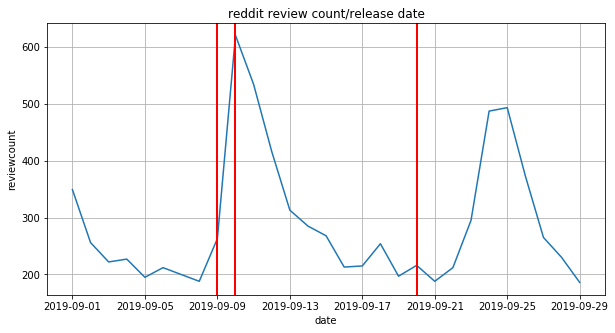

In [147]:
app = 'reddit'
i = 9
lp2(mdfs[app][i],
   'ReviewCount',
   app + ' review count/release date',
   apk_dfs[app].loc['2019-' + str(i)].index)

In [150]:
apk_dfs['reddit'].loc['2019-09']

,Version,Changes
Date,,
2019-09-20,3.36.0,"• You can now subscribe to or turn off notifications from a particular subreddit all from a Trending notification,• Recently viewed live discussion posts now show up in chat inbox,• Updated the emotes picker for r/FortniteBR,• Fixed an issue when application wasn't loading correctly,• Fixed sorting and displaying badges in membership tab for r/FortNiteBR,• Fixed a crash that occur when trying to load live threads,• Fixed a crash that occur when returning to a post after backgrounding the app"
2019-09-10,3.35.2,"• Fixed badge grouping on the badge management screen in r/FortNiteBR,• Fixed a rare crash that could occur when opening the app,• Fixed a rare issue when r/Popular wasn't loading,• Minor fixes and improvements"
2019-09-09,3.35.1,"• Fixed badge grouping on the badge management screen in r/FortNiteBR,• Fixed a rare crash that could occur when opening the app,• Fixed a rare issue when r/Popular wasn't loading,• Minor fixes and improvements"


In [161]:
print_changes('reddit', '2019-09-09', '•')

 Fixed badge grouping on the badge management screen in r/FortNiteBR,

 Fixed a rare crash that could occur when opening the app,

 Fixed a rare issue when r/Popular wasn't loading,



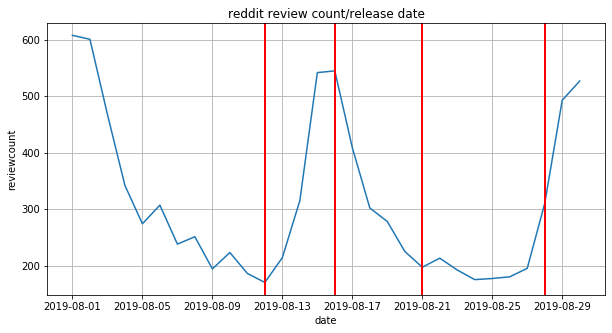

In [152]:
app = 'reddit'
i = 8
lp2(mdfs[app][i],
   'ReviewCount',
   app + ' review count/release date',
   apk_dfs[app].loc['2019-' + str(i)].index)

In [154]:
apk_dfs['reddit'].loc['2019-08']

,Version,Changes
Date,,
2019-08-28,3.34.1,"Fixed an issue that caused multiple ‘Trending today’ sections to appear at the top of r/Popular,Fixed an issue with displaying emojis,____________,Previously in 3.34.0,Fixed an issue when ""continue this thread"" button didn't work properly,Fixed a scrolling bug that could occur when viewing video or GIF posts,Minor fixes and improvements"
2019-08-21,3.33.2,"New in this release:,Fixed an issue where RPAN streams on Home and Popular pages would play at the same time,Fixes messaging for logged out users who want to start an RPAN stream,Other RPAN fixes and stability improvements,--------,Previously:,New! Auto night mode can now be set to follow Android Q’s Dark Theme setting,Fixed! Subreddits with underscores in their name can now be added to Custom Feeds,Fixes and improvements"
2019-08-16,3.33.1,"New in this release:,Fixes and improvements,--------,Previously:,New! Auto night mode can now be set to follow Android Q’s Dark Theme setting,Fixed! Subreddits with underscores in their name can now be added to Custom Feeds"
2019-08-12,3.33.0,"New! Auto night mode can now be set to follow Android Q’s Dark Theme setting,Fixed! Subreddits with underscores in their name can now be added to Custom Feeds,Minor fixes and improvement"


In [164]:
print_changes("reddit", "2019-08-12", "!")

 Auto night mode can now be set to follow Android Q’s Dark Theme setting,Fixed



In [165]:
print_changes("reddit", "2019-08-21", ",")

Fixed an issue where RPAN streams on Home and Popular pages would play at the same time

Fixes messaging for logged out users who want to start an RPAN stream

Other RPAN fixes and stability improvements

--------

Previously:

New! Auto night mode can now be set to follow Android Q’s Dark Theme setting

Fixed! Subreddits with underscores in their name can now be added to Custom Feeds

Fixes and improvements
Name: Changes

